## Working with PyCoM (locally)

PyCoM database (PyCoMdb) consists of two files:
1. Curated protein database from SwissProt. (pycom.db, 700MB)
2. Corresponding Coevolution Matrices of all proteins in hd5fy format. (pycom.mat, 114GB)

There are two ways of working with the PyCoMdb database using the PyCoM API.
1. Downloading the PyCoMdb files locally and working with them. This option requires 115GB of disk space for the two database files listed above. 
2. Using PyCoM API and working with the database located on the pycom.brunel.ac.uk. a tutorial for that is available in `01_Basics_DB_Remote.ipynb`.

### Installation

Install the PyCoM package:

* `pip install git+https://github.com/scdantu/pycom`
* Requires Python 3.8 or higher

Download the `pycom.db` and `pycom.mat` files from:

* [https://pycom.brunel.ac.uk/downloads](https://pycom.brunel.ac.uk/downloads) into your favourite folder for example [/Volumes/Data/PyCoMdb/]


## Tutorial 

First, lets import all the libraries and classes we need from pycom, pandas, matplotlib, and numpy

In [ ]:
# importing all usefull classes from PyCoM
from pycom import PyCom, ProteinParams,CoMAnalysis
import pandas as pd
import numpy as np
# matplotlib
import matplotlib
import matplotlib.pyplot as plt
#setting matplotlib parameters
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Arial"

In [1]:
#set the path to the database 
database_folder_path="/Volumes/mason/Work/Sarath/Research/pycom/"
#matrix file name and path
file_matrix_db = database_folder_path+"pycom.mat"
#protein database file name and path
file_protein_db= database_folder_path+"pycom.db"

In [3]:
#variables to set fontsize and color parameters for plotting
ticks_font=12
labels_font=14
my_color="#6495ED"

#### How to use PyCom with local database
If you have a copy of both `pycom.mat` and `pycom.db` on a local disk you will have access to all the features of PyCoM.
The code below shows you how to intialise and create a 'PyCom' object by specifying location of the database files.

Comment (add # at the beginning of the line) the code below if you do not have the database files.

In [3]:
obj_pycom = PyCom(db_path=file_protein_db, mat_path=file_matrix_db)

#### How to use PyCom with remote database

If you do not have a local copy of the pycom database files (see above), please uncomment (delete # at the beginning of the line) the code below.

For the complete pycom tutorial on how to use it remotely see `01_BASICS`

In [68]:
#obj_pycom = PyCom(remote=True)

Construct your query (its empty as I want all information)

In [6]:
# Here we are asking for all the proteins that match the enzyme class 3 and have been associated with the disease cancer.
query_parameters={ProteinParams.DI}
# executing the query returns a pandas dataframe with information about all the proteins which match the query

### Supported query keywords:
* `uniprot_id`: The UniProt ID of the protein.
* `sequence`: The amino acid sequence of protein to search for. (full match)
* `min_length` / `max_length`: Min/Max number of residues in the protein.
* `min_helix` / `max_helix`: Min/Max percentage of helical structure in the protein.
* `min_turn` / `max_turn`: Min/Max percentage of turn structure in the protein.
* `min_strand` / `max_strand`: Min/Max percentage of beta strand structure in the protein.
* `organism`: Taxonomic name of the genus / species of the protein. (case-insensitive)
  * Species name or any parent taxonomic level can be used. (`pyc.get_organism_list()` for full list)
  * Surround with `:` to get precise results
    * `:homo:` returns `Homo sapiens` & `Homo sapiens neanderthalensis`)
    * `homo` also returns **homo**eomma, t**homo**mys, and *hundreds* others
* `organism_id`: Precise NCBI Taxonomy ID of the species of the protein. (prefer to use `organism` instead)
* `cath`: CATH classification of the protein (`3.40.50.360` or `3.40.*.*` or `3.*`).
* `enzyme`: Enzyme Commission number of the protein. (`1.3.1.3` or `1.3.*.*` or `1.*`).
* `has_substrate`: Whether the protein has a known substrate. (`True`/`False`)
* `has_ptm`: Whether the protein has a known post-translational modification. (`True`/`False`)
* `has_pbd`: Whether the protein has a known PDB structure. (`True`/`False`)
* `disease`: The disease associated with the protein. (name of disease, case-insensitive, e.g `cancer`)
  * Use `pyc.get_disease_list()` for full list.
  * `cancer` searches for `Ovarian cancer`, `Lung cancer`, ...
* `disease_id`: The ID of the disease associated with the protein. (`DI-02205`, get_disease_list()
* `has_disease`: Whether the protein is associated with a disease. (`True`/`False`)
* `cofactor`: The cofactor associated with the protein. (name of cofactor, case-insensitive, e.g `Zn(2+)`])
* `cofactor_id`: The ID of the cofactor associated with the protein. (`CHEBI:00001`, get_cofactor_list())
* `biological_process`: Biological process associated with the protein. (e.g `antiviral defense`, use `pyc.get_biological_process_list()` for full list)
* `cellular_component`: Cellular component associated with the protein. (e.g `nucleus`, use `pyc.get_cellular_component_list()` for full list
* `domain`: Domain associated with the protein. (e.g `zinc-finger`, use `pyc.get_domain_list()` for full list)
* `ligand`: Ligand associated with the protein. (e.g `zinc`, use `pyc.get_ligand_list()` for full list
* `molecular_function`: Molecular function associated with the protein. (e.g `antioxidant activity`, use `pyc.get_molecular_function_list()` for full list
* `ptm`: Post-translational modification associated with the protein. (e.g `phosphoprotein`, use `pyc.get_ptm_list()` for full list

Finding out dimensions of the dataframe:

In [5]:
entries_data_frame=obj_pycom.find(query_parameters)

NameError: name 'obj_pycom' is not defined

In [4]:
entries_data_frame["neff"].mean

NameError: name 'entries_data_frame' is not defined

### Save the query to a csv file

In [8]:
entries_data_frame.to_csv("Full_DB_Query.csv",index=False)

### Read query data from csv file

In [90]:
#entries_data_frame=pd.read_csv("Full_DB.csv")

Find unique entries in a column:

In [13]:
entries_data_frame['has_ptm'].unique()

array([0, 1])

Get counts of categorical data in the column, for example number of proteins with a known PDB structure

In [10]:
entries_data_frame['has_pdb'].value_counts()

has_pdb
0    434632
1     22990
Name: count, dtype: int64

In [ ]:
What is the minimum and maximum value of a column?

In [34]:
entries_data_frame["neff"].min()

1.0

We can also use `describe()` function to get more detailed statistics:

In [ ]:
entries_data_frame["neff"].describe()

### Plot N_eff

Lets look at the distribution of $ N_{eff} $ in our query

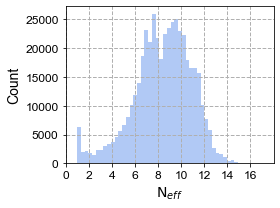

In [76]:
xlabel='$\mathrm{N}_{eff}$'
ylabel="Count"
plt.figure(figsize=(4,3))
neff_hist=plt.hist(entries_data_frame["neff"],bins=50,color=my_color,cumulative=False,density=False,alpha=0.5)
plt.xlabel(xlabel,fontsize=labels_font)
plt.ylabel(ylabel,fontsize=labels_font)
plt.xticks(np.arange(0,18,2),fontsize=ticks_font)
plt.yticks(fontsize=ticks_font)
plt.grid(linestyle="--",lw=1)
plt.tight_layout()
plt.savefig("Neff.png",dpi=300,transparent=True)

In [27]:
entries_data_frame.head()

,uniprot_id,neff,sequence_length,sequence,organism_id,helix_frac,turn_frac,strand_frac,has_ptm,has_pdb,has_substrate,matrix,enzyme_commission,cath_class,pdb_id,cofactor,ptm,disease_name,disease_id
0,P0C9F0,8.814,122,MVRLFYNPIKYLFYRRSCKKRLRKALKKLNFYHPPKECCQIYRLLE...,561445,0.0,0.0,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P0C9F1,8.668,126,MVRLFHNPIKCLFYRGSRKTREKKLRKSLKKLNFYHPPGDCCQIYR...,10500,0.0,0.0,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P0C9F2,8.755,124,MVRLFRNPIKCIFYRRSRKIQEKKLRKSLKKLNFYHPPEDCCQIYR...,561443,0.0,0.0,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P0C9E9,8.755,124,MVRLFRNPIKCIFYRRSRKIQEKKLRKSLKKLNFYHPPEDCCQIYR...,561444,0.0,0.0,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Q65209,6.062,141,MGNKESKYLEMCSEEAWLNIPNIFKCIFIRKLFYNKWLKYQEKKLK...,10498,0.0,0.0,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plot Sequence length distribution

Lets look at the distribution of sequence sizes in our query

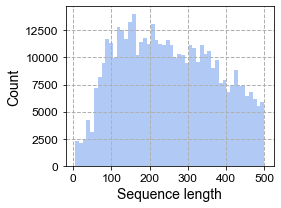

In [80]:
xlabel='Sequence length'
ylabel="Count"
plt.figure(figsize=(4,3))
seq_hist=plt.hist(entries_data_frame["sequence_length"],bins=50,color=my_color,cumulative=False,density=False,alpha=0.5)
plt.xlabel(xlabel,fontsize=labels_font)
plt.ylabel(ylabel,fontsize=labels_font)
plt.xticks(np.arange(0,550,100),fontsize=ticks_font)
plt.yticks(fontsize=ticks_font)
plt.grid(linestyle="--",lw=1)
plt.tight_layout()
plt.savefig("seq_len.png",dpi=300,transparent=True)

#### Get columns in the dataframe

### Add biological features to the dataframe for each protein

Initialise the object loader class and then call each add function

1. Add Enzyme Classification 
2. Add CATH Class
3. Add Co-factors
4. Add PTM
5. Add Diseases

For a protein entry if the requested data (EC/CATH/Cofactors...) does not exist, corresponding entry in that column will be `nan`. We can filter such rows as shown further below.

**Please note the dataloader functions will not work with remote version of PyCom**

In [16]:
#initialise the object for data loader class
obj_data_loader=obj_pycom.get_data_loader()

In [ ]:
#add enzyme commission data to the dataframe
entries_data_frame=obj_data_loader.add_enzyme_commission(entries_data_frame,force_single_entry=False)
#add CATH data to the dataframe
entries_data_frame=obj_data_loader.add_cath_class(entries_data_frame,force_single_entry=False)
#add CATH data to the dataframe
entries_data_frame=obj_data_loader.add_pdbs(entries_data_frame,force_single_entry=False)
#get list of all cofactors for each protein
entries_data_frame=obj_data_loader.add_cofactors(entries_data_frame,force_single_entry=False)
#get list of all PTM's for each protein
entries_data_frame=obj_data_loader.add_ptm(entries_data_frame,force_single_entry=False)
#get list of all diseases for each protein
entries_data_frame=obj_data_loader.add_diseases(entries_data_frame,force_single_entry=False)

#### Save the progress to a csv file

As we have added a lot of information to our dataframe, let's save our progress so that we can restart from this point, in future, if required.

In [21]:
entries_data_frame.to_csv("Full_DB_With_Details.csv",index=False)

### Statistics

Let's look at some statistics for all the columns in the dataframe. Below are some examples of how you can do some fun things with the dataframe.

In [ ]:
#include=all will also include columns with 'nan' entries
ec_full.describe(include="all")

Find unique entries in a column and count them:

In [ ]:
entries_data_frame['sequence'].unique().sum()

Count columns without 'nan' entries

In [26]:
#Number of proteins with pdb data
entries_data_frame["pdb_id"].notna().sum()

22990

In [31]:
#number of proteins with cofactors
entries_data_frame["cofactor"].notna().sum()

91097

In [32]:
#number of proteins with a known CATH class
entries_data_frame["cath_class"].notna().sum()

285937

Filter the dataframe by removing entries without any EC/CATH data

In [22]:
#removing all entries without any EC class
entries_with_ec_data=entries_data_frame[entries_data_frame["enzyme_commission"].notna()]

#removing all entries without any CATH class
entries_with_cath_data=entries_data_frame[entries_data_frame["cath_class"].notna()]

In [26]:
#count frequency of items with 'nan' value
entries_with_cath_data["cath_class"].isna().value_counts()

cath_class
False    285937
Name: count, dtype: int64

Functions to group CATH/EC data and count the frequency of top class

In [33]:
from collections import OrderedDict

dict_group_data={}

# function to count the frequency of super class
def group_data_by_class(data,data_type=1):
    global dict_group_data
    dict_group_data={}
    data_class="enzyme_commission"
    if(data_type==1):
        data_class="enzyme_commission"
    if(data_type==2):
        data_class="cath_class"

    for i_data in data[data_class]:
        n=len(i_data)
        if(n==1):
            classid=i_data[0].split('.')[0]
            update_dict_group(classid)
        if(n>1):
            for j in i_data:
                update_dict_group(j[0].split('.')[0])
    
    dict_group_data=dict(sorted(dict_group_data.items()))    
    return dict_group_data

# function to update the dictionary 
def update_dict_group(classid):
    global dict_group_data

    if(classid in dict_group_data.keys()):
        dict_group_data[classid]=dict_group_data[classid]+1
    else:
        dict_group_data[classid]=1

#### Plot Enzyme Commission data

In [34]:
#get a dictionary with frequency of each EC super class
ec_numbers=group_data_by_class(entries_with_ec_data,data_type=1)
ec_numbers

{'1': 28581,
 '2': 80264,
 '3': 48572,
 '4': 22166,
 '5': 12752,
 '6': 16888,
 '7': 10333}

In [ ]:
plt.figure(figsize=(4,3))
plt.bar(ec_numbers.keys(),
        height=ec_numbers.values(),
        color=my_color
       )
plt.xlabel("Enzyme Commission Class",fontsize=labels_font)
plt.ylabel("Count",fontsize=labels_font)
plt.xticks(fontsize=ticks_font)
plt.yticks(fontsize=ticks_font)
plt.grid(axis='y',ls="--",lw=1)
plt.tight_layout()
plt.savefig("ecdata.png",dpi=300,transparent=True)

#### Plot CATH data

In [35]:
#get a dictionary with frequency of each CATH super class
cath_numbers=group_data_by_class(entries_with_cath_data,data_type=2)
cath_numbers

{'1': 69567, '2': 48531, '3': 225736, '4': 8556, '6': 1021}

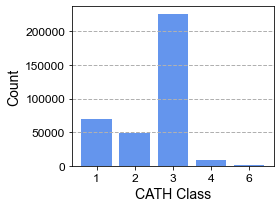

In [79]:
plt.figure(figsize=(4,3))
plt.bar(cath_numbers.keys(),
                 height=cath_numbers.values(),
                 color=my_color         
                )
plt.xlabel("CATH Class",fontsize=labels_font)
plt.ylabel("Count",fontsize=labels_font)
plt.xticks(fontsize=ticks_font)
plt.yticks(fontsize=ticks_font)
plt.grid(axis='y',ls="--",lw=1)
plt.tight_layout()
plt.savefig("cathdata.png",dpi=300,transparent=True)

# Load coevolution matrix

# Plot the matrix and save it

In [ ]:
# Save the list of top coevolution pairs